# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lachie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('keys.env')
api_key = os.getenv('NEWS_API')
type(api_key)

str

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin', language = 'en', sort_by = 'relevancy')

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum', language = 'en', sort_by = 'relevancy')

In [6]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_news['articles']:
    text = articles['content']
    results = analyzer.polarity_scores(text)
    compound = results['compound']
    pos = results['pos']
    neg = results['neg']
    neu = results['neu']
    sentiments.append({
        'Text':text,
        'Compound': compound,
        'Positive': pos,
        'Negative': neg,
        'Neutral': neu
    })
    
btc_df = pd.DataFrame(sentiments)
btc_df.head()

,Text,Compound,Positive,Negative,Neutral
0,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
4,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [7]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_news['articles']:
    text = articles['content']
    results = analyzer.polarity_scores(text)
    compound = results['compound']
    pos = results['pos']
    neg = results['neg']
    neu = results['neu']
    sentiments.append({
        'Text':text,
        'Compound': compound,
        'Positive': pos,
        'Negative': neg,
        'Neutral': neu
    })
    
eth_df = pd.DataFrame(sentiments)
eth_df.head()

,Text,Compound,Positive,Negative,Neutral
0,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.007080,0.068500,0.066150,0.865300
std,0.382331,0.064372,0.057928,0.092949
min,-0.549900,0.000000,0.000000,0.557000
25%,-0.335475,0.000000,0.039000,0.827000
50%,0.012800,0.064000,0.063000,0.888000
75%,0.350450,0.092250,0.077000,0.924250
max,0.750600,0.202000,0.241000,0.964000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,-0.010760,0.05290,0.047500,0.899700
std,0.433743,0.07589,0.044936,0.063144
min,-0.690800,0.00000,0.000000,0.731000
25%,-0.284450,0.00000,0.000000,0.858750
50%,-0.189700,0.00000,0.059000,0.923000
75%,0.303775,0.07650,0.069000,0.937000
max,0.865500,0.26900,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Etherium

Q. Which coin had the highest positive score?

A: Etherium

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("'s")
sw.append('char')
sw.append('getty')
sw.append('reuters')
sw = set(sw)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = list(filter(lambda w: w not in punctuation, words))
    
    # Lemmatize words into root words
    words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda w: w.lower() not in sw, words))
    
    return words

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.Text.apply(tokenizer)
btc_df

,Text,Compound,Positive,Negative,Neutral,tokens
0,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, women-focused, crypto, ..."
1,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[Bitcoin, mining, site, powered, otherwise, lo..."
2,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[Warren, Buffett, ha, always, bitcoin, skeptic..."
3,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[Image, source, Images, value, Bitcoin, contin..."
5,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807,"[youve, ever, felt, like, introducing, Vegas-s..."
6,Cryptocurrency mixers are sometimes used to he...,-0.4404,0.202,0.241,0.557,"[Cryptocurrency, mixer, sometimes, used, help,..."
7,"BTC fell to its lowest level since last July, ...",0.1027,0.076,0.066,0.859,"[BTC, fell, lowest, level, since, last, July, ..."
8,Posted \r\nFrom Bitcoin's dramatic drop to a n...,-0.3612,0.000,0.123,0.877,"[Posted, Bitcoin, dramatic, drop, new, way, pa..."
9,"May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...",-0.3818,0.000,0.077,0.923,"[May, 11, Bitcoin, fell, 7.23, 28,758.29, 22:0..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.Text.apply(tokenizer)
eth_df

,Text,Compound,Positive,Negative,Neutral,tokens
0,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[Meta, ha, revealed, NFTs, work, Instagram, US..."
1,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multi-billion, dollar, cryptocurrency, compan..."
2,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[Bored, Ape, Yacht, Club, creator, Yuga, Labs,..."
3,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[April, 26, Ether, ha, promised, better, ha, p..."
4,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[Ethereum, preparing, upgrade, thats, describe..."
5,Dogecoiners unite! Movie theater chain AMC has...,0.4003,0.078,0.000,0.922,"[Dogecoiners, unite, Movie, theater, chain, AM..."
6,There's a new metaverse project from the creat...,-0.2732,0.000,0.063,0.937,"[new, metaverse, project, creator, ``, Bored, ..."
7,Editorial IndependenceWe want to help you make...,0.6908,0.178,0.000,0.822,"[Editorial, IndependenceWe, want, help, make, ..."
8,"40 days ago Bitcoin sold for $47,454. It's pri...",-0.6908,0.000,0.178,0.822,"[40, day, ago, Bitcoin, sold, 47,454, price, 3..."
9,When Nvidia launched its Ampere Lite Hash Rate...,-0.3818,0.069,0.085,0.847,"[Nvidia, launched, Ampere, Lite, Hash, Rate, L..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_grams = ngrams(tokenizer(btc_df.Text.str.cat()), 2)
Counter(btc_grams).most_common(10)

[(('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('interest', 'rate'), 2),
 (('dramatic', 'drop'), 2),
 (('year', 'low'), 2),
 (('Bitcoin', 'dropped'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
eth_grams = ngrams(tokenizer(eth_df.Text.str.cat()), 2)
Counter(eth_grams).most_common(10)

[(('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('Yuga', 'Labs'), 2),
 (('Yacht', 'Club'), 2),
 (('April', '26'), 2),
 (('ha', 'promised'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
tokens = tokenizer(btc_df.Text.str.cat())
token_count(tokens, 10)

[('Bitcoin', 12),
 ('cryptocurrency', 10),
 ('ha', 6),
 ('world', 6),
 ('bitcoin', 5),
 ('week', 5),
 ('investor', 4),
 ('dropped', 4),
 ('previous', 4),
 ('close', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
tokens = tokenizer(eth_df.Text.str.cat())
token_count(tokens, 10)

[('cryptocurrency', 10),
 ('Bitcoin', 10),
 ('ha', 7),
 ('world', 6),
 ('biggest', 5),
 ('Ethereum', 4),
 ('NFT', 4),
 ('April', 4),
 ('week', 4),
 ('previous', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

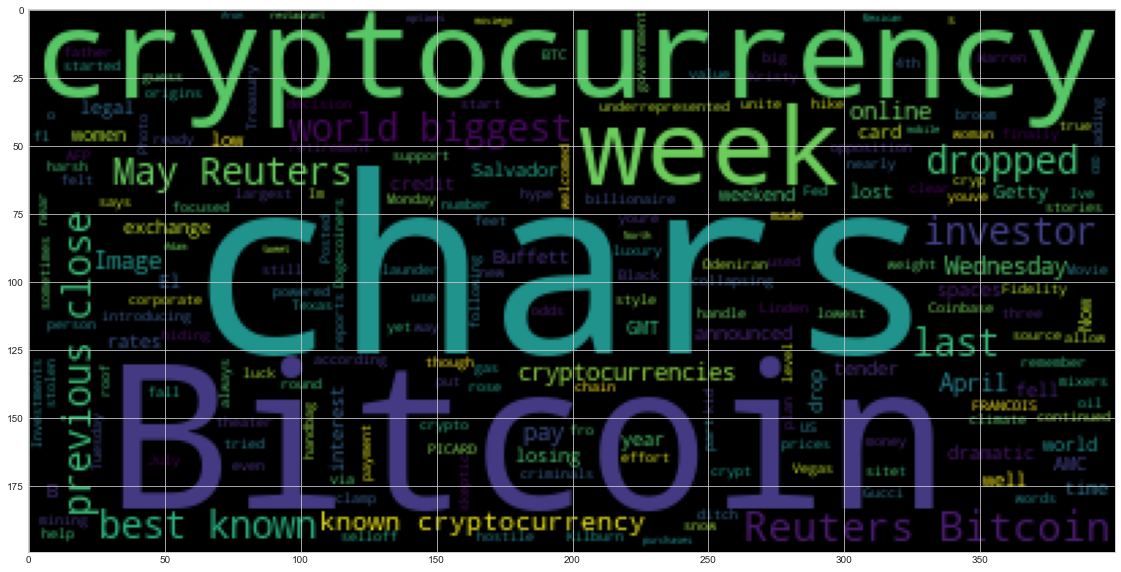

In [22]:
# Generate the Bitcoin word cloud
cloud = WordCloud().generate(btc_df.Text.str.cat())
plt.imshow(cloud)

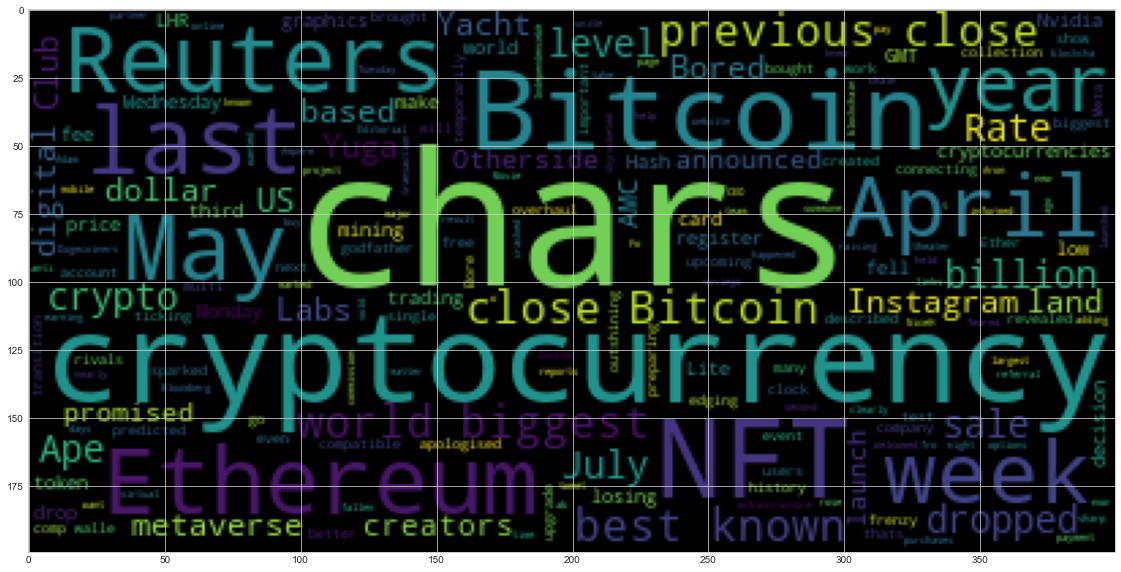

In [23]:
# Generate the Ethereum word cloud
cloud = WordCloud().generate(eth_df.Text.str.cat())
plt.imshow(cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
big_str_btc = btc_df.Text.str.cat()

In [28]:
# Run the NER processor on all of the text
doc = nlp(big_str_btc)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin'

In [29]:
# Render the visualization
displacy.render(doc, style='ent', jupyter = True)

In [30]:
# List all Entities
for entity in doc.ents:
    print(entity.text, entity.label_)

Odeniran GPE
Linden GPE
Texas GPE
April 4th DATE
2022 DATE
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Buffett PERSON
the weekend DATE
Buffett PERSON
nearly three feet QUANTITY
Getty Images ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
Bitcoin PERSON
Gucci PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday DATE
2,241.68 MONEY
Bitcoin PERSON
40.4% PERCENT
+361 CARDINAL
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin PERSON
20.9% PERCENT
year DATE
26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
Monday DATE
2,655.98 MONEY
Bitcoin PERSON
35% PERCENT
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
Mexican NORP
North London GPE
a few

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
big_str_eth = eth_df.Text.str.cat()

In [32]:
# Run the NER processor on all of the text
doc = nlp(big_str_btc)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin'

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
displacy.render(doc, style='ent', jupyter = True)

In [34]:
# List all Entities
# YOUR CODE HERE!

---